<a href="https://colab.research.google.com/github/upto-master/upto_image/blob/upto_color_jisu/%5B%EC%97%85%ED%88%AC%5D2D3D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2-class Classification-CNNbasic

In [ ]:
import os

In [ ]:
train_2D_dir = '/content/drive/MyDrive/업투/2D3D/2D'
train_3D_dir = '/content/drive/MyDrive/업투/2D3D/3D'

In [ ]:
train_2D_fnames = os.listdir( train_2D_dir )
train_3D_fnames = os.listdir( train_3D_dir )

print(train_2D_fnames[:5])
print(train_3D_fnames[:5])

['33.png', '35.png', '37.png', '39.png', '41.png']
['34.png', '38.png', '40.png', '36.png', '42.png']


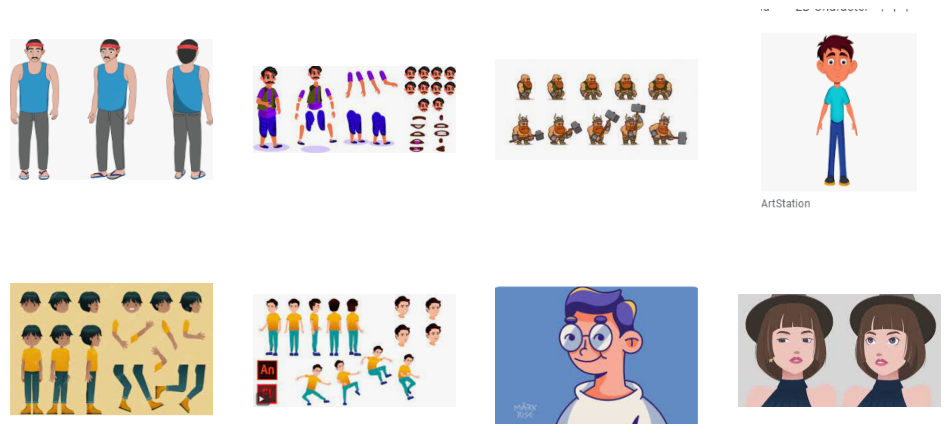

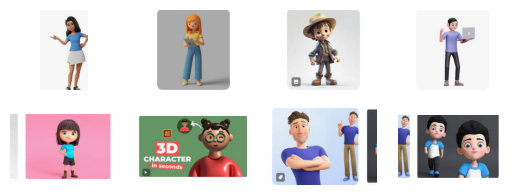

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_2D_pix = [os.path.join(train_2D_dir, fname)
                for fname in train_2D_fnames[ pic_index-8:pic_index]]

next_3D_pix = [os.path.join(train_3D_dir, fname)
                for fname in train_3D_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_2D_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

for i, img_path in enumerate(next_3D_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
train_dir = '/content/drive/MyDrive/업투/2D3D'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255.)
test_datagen  = ImageDataGenerator( rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))

Found 1596 images belonging to 2 classes.


In [ ]:
# 훈련에 사용되는 고양이/개 이미지 경로
train_2D_dir = os.path.join(train_dir, '2D')
train_3D_dir = os.path.join(train_dir, '3D')
print(train_2D_dir)
print(train_3D_dir)

/content/drive/MyDrive/업투/2D3D/2D
/content/drive/MyDrive/업투/2D3D/3D


In [ ]:
train_2D_fnames = os.listdir( train_2D_dir )
train_3D_fnames = os.listdir( train_3D_dir )

print(train_2D_fnames[:5])
print(train_3D_fnames[:5])

['33.png', '35.png', '37.png', '39.png', '41.png']
['34.png', '38.png', '40.png', '36.png', '42.png']


In [ ]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    #validation_data=validation_generator,
                    steps_per_epoch=10,
                    epochs=50,
                    validation_steps=50,
                    verbose=2)

Epoch 1/50
10/10 - 2s - loss: 0.4762 - accuracy: 0.7700 - 2s/epoch - 158ms/step
Epoch 2/50
10/10 - 2s - loss: 0.4179 - accuracy: 0.8000 - 2s/epoch - 219ms/step
Epoch 3/50
10/10 - 3s - loss: 0.4249 - accuracy: 0.8200 - 3s/epoch - 261ms/step
Epoch 4/50
10/10 - 2s - loss: 0.4217 - accuracy: 0.8000 - 2s/epoch - 225ms/step
Epoch 5/50
10/10 - 1s - loss: 0.3945 - accuracy: 0.8316 - 1s/epoch - 125ms/step
Epoch 6/50
10/10 - 1s - loss: 0.3635 - accuracy: 0.8450 - 857ms/epoch - 86ms/step
Epoch 7/50
10/10 - 1s - loss: 0.3604 - accuracy: 0.8450 - 861ms/epoch - 86ms/step
Epoch 8/50
10/10 - 1s - loss: 0.4032 - accuracy: 0.8061 - 1s/epoch - 104ms/step
Epoch 9/50
10/10 - 1s - loss: 0.3846 - accuracy: 0.8550 - 936ms/epoch - 94ms/step
Epoch 10/50
10/10 - 1s - loss: 0.3710 - accuracy: 0.8650 - 918ms/epoch - 92ms/step
Epoch 11/50
10/10 - 1s - loss: 0.4653 - accuracy: 0.7900 - 1s/epoch - 111ms/step
Epoch 12/50
10/10 - 1s - loss: 0.2941 - accuracy: 0.8850 - 1s/epoch - 108ms/step
Epoch 13/50
10/10 - 1s - loss

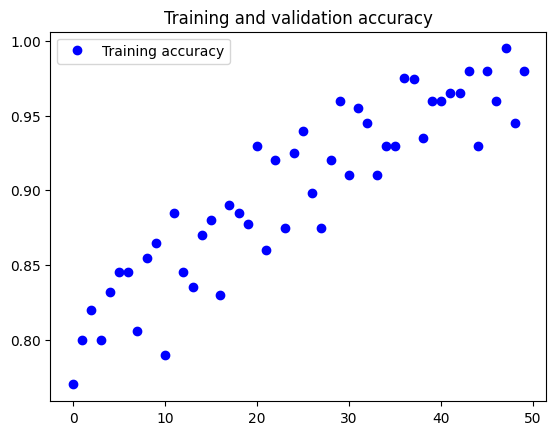

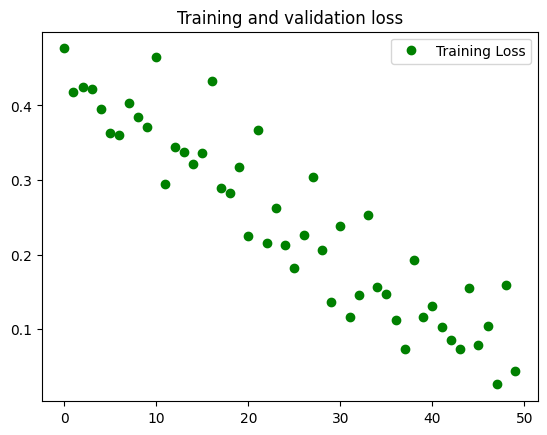

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
#plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image


path = '/content/3D_2.jpg'
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
x = x / 255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(x)

print(classes[0])
if classes[0]<0.5:
  print("2d")
else:
  print("3d")

1/1 [==============================] - 0s 72ms/step
[0.3691649]
2d


## Resnet-18 2class Classification
- https://www.kaggle.com/code/vvijaybabu/2-class-classification-resnet-18-kernel

- 기존 pretrained 모델에 Linear 붙여서 2-class로 만드는 방식

In [ ]:
import numpy as np
import pandas as pd


import os


In [ ]:
import argparse
import random
import shutil
import time
import warnings
import sys
import sklearn
import pandas as pd
import tqdm
import copy

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim
import torch.multiprocessing as mp
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.utils as tvutils
import shutil
print("packages loaded")

packages loaded


In [ ]:
ngpus_per_node = torch.cuda.device_count()
feature_extract = False # if true this will not re-train the model, but only change the last stage
use_pretrained = True

In [ ]:
model = models.resnet18(pretrained=use_pretrained) #pretrained=use_pretrained
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 26.6MB/s]


In [ ]:
if feature_extract:
        for param in model.parameters():
            param.requires_grad = False

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model.to(device)

criterion = nn.CrossEntropyLoss().cuda(ngpus_per_node)

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

In [ ]:
full_dataset = datasets.ImageFolder(
    train_dir,
    transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ]))

In [ ]:
full_dataset

Dataset ImageFolder
    Number of datapoints: 1601
    Root location: /content/drive/MyDrive/업투/2D3D
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [1280, 321])
print("train length",full_dataset.__len__)

train length <bound method DatasetFolder.__len__ of Dataset ImageFolder
    Number of datapoints: 1601
    Root location: /content/drive/MyDrive/업투/2D3D
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )>


In [ ]:
batch = 128
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch, shuffle= False,
    pin_memory=True)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch, shuffle= False,
    pin_memory=True)

In [ ]:
params_to_update = []

if feature_extract:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
#            print("\t",name)
else:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
#            print("\t",name)

optimizer = torch.optim.SGD(params_to_update, 0.001,
                            momentum=0.9,
                            weight_decay=1e-4)

In [ ]:
import copy

best_acc1 = 0

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)



def accuracy(output, target,iter_cnt, topk=(1,)):
    """Computes the accuracy over the k top predictions for the specified values of k"""
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))
        res = []
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res


def train(train_loader,model, criterion, optimizer, epoch):

    # switch to train mode
    model.train()
    top1 = AverageMeter('Acc@1', ':6.2f')

    for i, (input,target) in enumerate(train_loader):
        #input = input.cuda(0, non_blocking=True)
        #target = target.cuda(0, non_blocking=True)
        input = input.to(device)
        target = target.to(device)
        # compute output
        output = model(input)
        loss = criterion(output, target)

        # measure accuracy and record loss
        acc1, acc5 = accuracy(output, target, i,topk=(1, 1)) #
        top1.update(acc1[0], input.size(0))

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


def validate(val_loader,model, criterion):

    # switch to evaluate mode
    model.eval()
    top1 = AverageMeter('Acc@1', ':6.2f')

    with torch.no_grad():
        end = time.time()
        for i,(input, target) in enumerate(val_loader):
            input = input.to(device)
            target = target.to(device)
            # compute output
            output = model(input)
            loss = criterion(output, target)

            # measure accuracy and record loss
            acc1, acc5 = accuracy(output, target, i,topk=(1, 1))
            top1.update(acc1[0], input.size(0))

        print(' * Acc@1 {top1.avg:.3f}'
              .format(top1=top1))

    return top1.avg

max_epoch = 40
best_model_wts = copy.deepcopy(model.state_dict())
best_acc1 = 0

for epoch in tqdm.tqdm(range(0, max_epoch)):
    train(train_loader, model, criterion, optimizer, epoch)

    # evaluate on validation set
    acc1 = validate(val_loader, model, criterion)

    # remember best acc@1 and save checkpoint
    is_best = acc1 > best_acc1
    if (acc1 > best_acc1):
        best_acc1 = acc1
        best_model_wts = copy.deepcopy(model.state_dict())
model.load_state_dict(best_model_wts)

  0%|          | 0/25 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
  4%|▍         | 1/25 [00:10<04:09, 10.38s/it]

 * Acc@1 89.408


  8%|▊         | 2/25 [00:20<03:51, 10.08s/it]

 * Acc@1 90.031


 12%|█▏        | 3/25 [00:30<03:43, 10.18s/it]

 * Acc@1 91.589


 16%|█▌        | 4/25 [00:40<03:34, 10.22s/it]

 * Acc@1 91.277


 20%|██        | 5/25 [00:50<03:20, 10.04s/it]

 * Acc@1 90.343


 24%|██▍       | 6/25 [01:00<03:09,  9.98s/it]

 * Acc@1 89.097


 28%|██▊       | 7/25 [01:10<03:01, 10.11s/it]

 * Acc@1 90.654


 32%|███▏      | 8/25 [01:21<02:54, 10.24s/it]

 * Acc@1 90.031


 36%|███▌      | 9/25 [01:31<02:41, 10.07s/it]

 * Acc@1 91.277


 40%|████      | 10/25 [01:41<02:30, 10.06s/it]

 * Acc@1 90.031


 44%|████▍     | 11/25 [01:51<02:22, 10.15s/it]

 * Acc@1 90.031


 48%|████▊     | 12/25 [02:01<02:12, 10.19s/it]

 * Acc@1 89.097


 52%|█████▏    | 13/25 [02:11<01:59,  9.98s/it]

 * Acc@1 89.408


 56%|█████▌    | 14/25 [02:21<01:50, 10.04s/it]

 * Acc@1 90.031


 60%|██████    | 15/25 [02:31<01:41, 10.12s/it]

 * Acc@1 90.654


 64%|██████▍   | 16/25 [02:41<01:31, 10.17s/it]

 * Acc@1 90.654


 68%|██████▊   | 17/25 [02:52<01:21, 10.21s/it]

 * Acc@1 89.408


 72%|███████▏  | 18/25 [03:02<01:12, 10.34s/it]

 * Acc@1 90.654


 76%|███████▌  | 19/25 [03:13<01:02, 10.37s/it]

 * Acc@1 90.654


 80%|████████  | 20/25 [03:23<00:51, 10.37s/it]

 * Acc@1 90.031


 84%|████████▍ | 21/25 [03:33<00:40, 10.07s/it]

 * Acc@1 88.474


 88%|████████▊ | 22/25 [03:43<00:30, 10.16s/it]

 * Acc@1 90.343


 92%|█████████▏| 23/25 [03:53<00:20, 10.17s/it]

 * Acc@1 87.227


 96%|█████████▌| 24/25 [04:03<00:10, 10.18s/it]

 * Acc@1 90.343


100%|██████████| 25/25 [04:13<00:00, 10.13s/it]

 * Acc@1 88.785


<All keys matched successfully>

In [ ]:
test_dataset = datasets.ImageFolder(
    '/content/drive/MyDrive/업투/Test_Image',
    transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ]))

In [ ]:
test_count = len([name for name in os.listdir('/content/drive/MyDrive/업투/Test_Image')])
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=1, shuffle= False,
    pin_memory=True)

In [ ]:
test_loader

In [ ]:
import numpy as np

In [ ]:
print(full_dataset.classes)
print(full_dataset.class_to_idx)

['2D', '3D']
{'2D': 0, '3D': 1}


In [ ]:
#preddir = os.path.join('../input/', 'test')

# evaluate on test set
model.eval()
pred_submit = pd.DataFrame(np.zeros(50,dtype=int))
with torch.no_grad():
    end = time.time()
    for i,(input, target) in tqdm.tqdm(enumerate(test_loader)):

        input = input.cuda(0, non_blocking=True)
        # compute output
        output = model(input)
        val,pred = torch.max(output, 1)
        if (pred[0] == 0):
            val[0] = torch.sigmoid(val[0])
        else:
            if (pred[0] == 1):
                val[0] = 1-torch.sigmoid(val[0])
            else:
                val[0] = 2
        pred_submit.iloc[i,0] = val[0].cpu().numpy()
#prediction = pd.reada_csv('/Content/sample_submission.csv',header = 0,index_col=0)
#pred_submit.index = prediction.index
#prediction.iloc[:,0] = pred_submit.iloc[:,0]
#print(prediction.head())
#os.mkdir("../output/")
#prediction.to_csv("samplesubmission.csv")

50it [00:02, 19.47it/s]


In [ ]:
true_label = ['2d']*25+ ['3d']*25

In [ ]:
true_label

['2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '2d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d',
 '3d']

In [ ]:
#0.5넘으면 2d로 예측
pred_submit

,0
0,0.959729
1,0.942492
2,0.853635
3,0.946188
4,0.989591
5,0.803717
6,0.965292
7,0.581737
8,0.945034
9,0.986452


In [ ]:
pred_label= []
for i in range(len(pred_submit)):
  if pred_submit[0][i]>=0.5 :
    pred_label.append("2d")
  else:
    pred_label.append("3d")

In [ ]:
pred_df = pd.DataFrame()
pred_df['pred'] = pred_label
pred_df['actual'] =  true_label

In [ ]:
true_list = []
num = 0
for i in range(len(pred_df)):
  if pred_df['pred'][i] == pred_df['actual'][i]:
    true_list.append("True")
    num += 1

  else:
    true_list.append("False")

print(num/50)

0.84


In [ ]:
pred_df

,pred,actual
0,2d,2d
1,2d,2d
2,2d,2d
3,2d,2d
4,2d,2d
5,2d,2d
6,2d,2d
7,2d,2d
8,2d,2d
9,2d,2d
